# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

for city in cities:
    
    response_json = requests.get(query_url + city).json()
    
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    except:
        
        print("That record does not exist, searching for next record...")

City Name: francistown, City ID: 933778
City Name: busselton, City ID: 2075265
City Name: klaksvik, City ID: 2618795
City Name: hermanus, City ID: 3366880
City Name: kutum, City ID: 371745
City Name: avarua, City ID: 4035715
City Name: rawson, City ID: 3839307
City Name: newport, City ID: 2641598
City Name: lebu, City ID: 3883457
City Name: mar del plata, City ID: 3430863
City Name: faanui, City ID: 4034551
City Name: pucallpa, City ID: 3693345
City Name: jamestown, City ID: 5122534
City Name: atuona, City ID: 4020109
City Name: yellowknife, City ID: 6185377
City Name: port keats, City ID: 2063039
City Name: hobart, City ID: 2163355
City Name: hilo, City ID: 5855927
City Name: thai binh, City ID: 1566346
City Name: tuktoyaktuk, City ID: 6170031
City Name: svetlogorsk, City ID: 10722858
City Name: rikitea, City ID: 4030556
City Name: constitucion, City ID: 3893726
City Name: souillac, City ID: 933995
City Name: ola, City ID: 2122574
City Name: cape town, City ID: 3369157
City Name: mata

City Name: husavik, City ID: 2629833
City Name: cidreira, City ID: 3466165
City Name: ilulissat, City ID: 3423146
That record does not exist, searching for next record...
City Name: ornskoldsvik, City ID: 2686469
City Name: severnyy, City ID: 496358
City Name: kushima, City ID: 1895695
City Name: leh, City ID: 1264976
City Name: kaitangata, City ID: 2208248
City Name: kosonsoy, City ID: 1513714
City Name: jasper, City ID: 4392354
That record does not exist, searching for next record...
City Name: fukue, City ID: 1863997
City Name: norman wells, City ID: 6089245
That record does not exist, searching for next record...
City Name: mahebourg, City ID: 934322
City Name: senanga, City ID: 898947
City Name: naliya, City ID: 1262062
City Name: hervey bay, City ID: 2146219
City Name: richards bay, City ID: 962367
City Name: virovitica, City ID: 3187694
City Name: dzhebariki-khaya, City ID: 2024626
City Name: zhigansk, City ID: 2012530
City Name: saskylakh, City ID: 2017155
City Name: wollongong

City Name: inzer, City ID: 556279
City Name: longyearbyen, City ID: 2729907
City Name: jacareacanga, City ID: 3397763
City Name: wajima, City ID: 1848976
City Name: bukoba, City ID: 160961
City Name: saint anthony, City ID: 5044290
City Name: urucara, City ID: 3385670
City Name: stornoway, City ID: 2636790
City Name: nouakchott, City ID: 2377450
City Name: nampula, City ID: 1033356
City Name: flin flon, City ID: 5954718
City Name: antofagasta, City ID: 3899539
City Name: ouro preto do oeste, City ID: 3924948
City Name: matagami, City ID: 6067747
City Name: chernyshevskiy, City ID: 2025456
City Name: atbasar, City ID: 1526038
City Name: makakilo city, City ID: 5850554
City Name: meadow lake, City ID: 5478673
City Name: wattegama, City ID: 1224061
City Name: ambilobe, City ID: 1082243
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: pacific grove, City ID: 5380437
City Name: vestmannaeyjar, City ID: 3412093
That 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,933778,Francistown,BW,-21.1700,27.5079,66.52,70,100,14.74
1,2075265,Busselton,AU,-33.6500,115.3333,61.05,66,100,9.28
2,2618795,Klaksvík,FO,62.2266,-6.5890,52.72,85,100,21.00
3,3366880,Hermanus,ZA,-34.4187,19.2345,56.89,75,0,7.56
4,371745,Kutum,SD,14.2000,24.6667,73.09,24,59,7.09


In [45]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

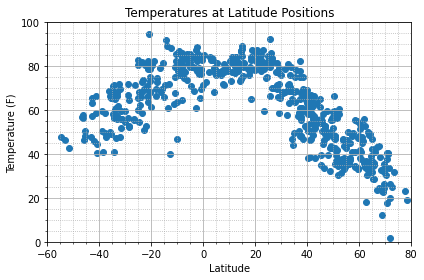

The relationship between latitude and temperature and it shows the temperature gets hotter as you approach the equator


<Figure size 432x288 with 0 Axes>

In [46]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig1.png")

print("The relationship between latitude and temperature and it shows the temperature gets hotter as you approach the equator")


## Latitude vs. Humidity Plot

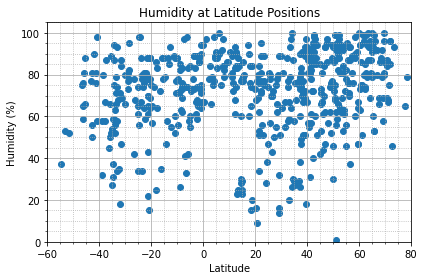

The relationship between latitude and humidity shows that there is little to no correlation between the two


<Figure size 432x288 with 0 Axes>

In [47]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig2.png")

print("The relationship between latitude and humidity shows that there is little to no correlation between the two")

## Latitude vs. Cloudiness Plot

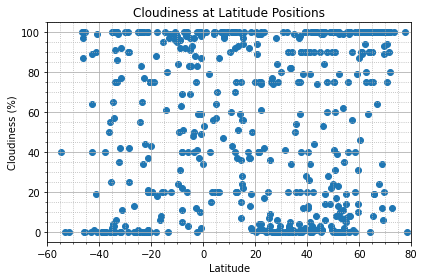

The relationship between latitude and cloudiness shows that there is little to no correlation between the two


<Figure size 432x288 with 0 Axes>

In [48]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig3.png")

print("The relationship between latitude and cloudiness shows that there is little to no correlation between the two")

## Latitude vs. Wind Speed Plot

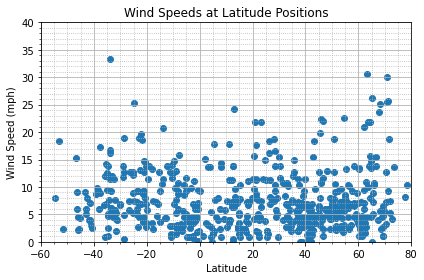

The relationship between latitude and wind speed shows that wind speeds are greater when they are farther away from the equator


<Figure size 432x288 with 0 Axes>

In [49]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig4.png")

print("The relationship between latitude and wind speed shows that wind speeds are greater when they are farther away from the equator")

## Linear Regression

In [50]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8901634030085853
The regression has a negative correlation
In the Northern Hemisphere, the plot shows the temperature decreasing while the latitude increases


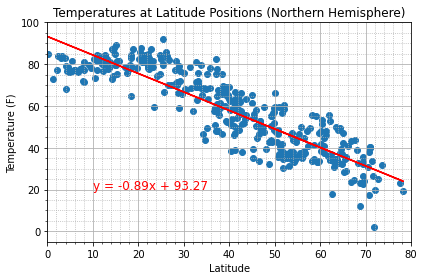

In [51]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/Fig5.png")

print(f"The r-squared is: {rvalue}")
print("The regression has a negative correlation")
print("In the Northern Hemisphere, the plot shows the temperature decreasing while the latitude increases")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7228920401332997
The regression has a positive correlation
In the Southern Hemisphere, the plot shows the temperature increasing


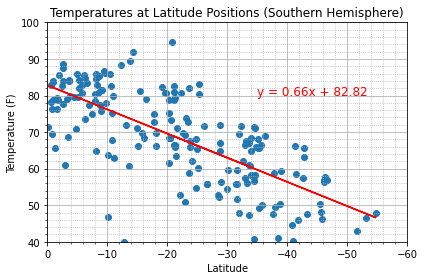

In [52]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("output_data/Fig6.png")

print(f"The r-squared is: {rvalue}")
print("The regression has a positive correlation")
print("In the Southern Hemisphere, the plot shows the temperature increasing")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The closer to the equator, the higher the temperature is. The Northern Hemisphere has 1:1 relationship


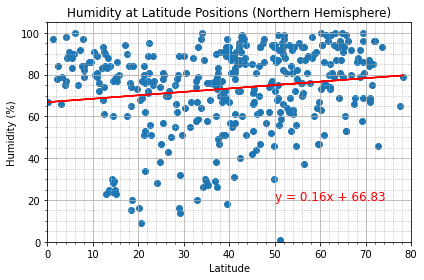

<Figure size 432x288 with 0 Axes>

In [54]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
print("The closer to the equator, the higher the temperature is. The Northern Hemisphere has 1:1 relationship")
plt.show()
plt.savefig("output_data/Fig7.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Both hemispheres have the same inverse relationship between latitude and temperature.


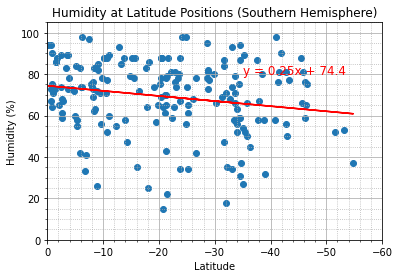

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
print("Both hemispheres have the same inverse relationship between latitude and temperature.")

#plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

No strong correlation between humidity and latitude, but the Northern Hemisphere has a positive correlation, which means the further away from the equator, the humidity increases.


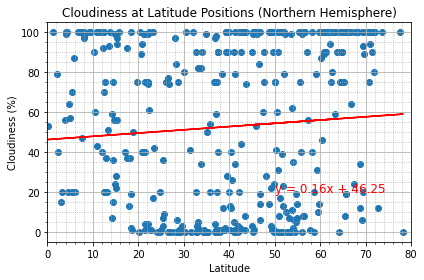

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
print("No strong correlation between humidity and latitude, but the Northern Hemisphere has a positive correlation, which means the further away from the equator, the humidity increases.")
plt.show()
plt.savefig("output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a slight negative correlation in the Southern Hemisphere and humidity decreases the farther away from the equator.


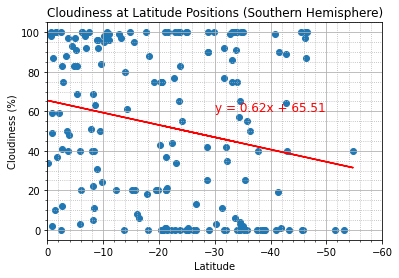

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
print("There is a slight negative correlation in the Southern Hemisphere and humidity decreases the farther away from the equator.")
plt.show()
plt.savefig("output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Northern Hemisphere has a positive correlation, but no correlation between the cloudiness and latitude.


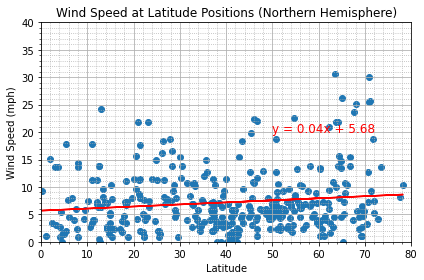

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
print("The Northern Hemisphere has a positive correlation, but no correlation between the cloudiness and latitude.")
plt.show()
plt.savefig("output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is a negative correlation in the Southern Hemisphere and it is less cloudy the further away from the equator.


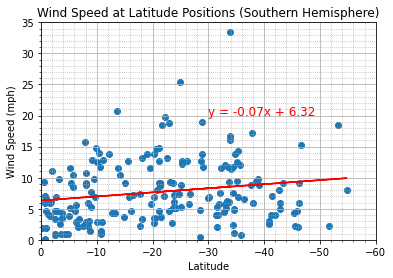

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
print("There is a negative correlation in the Southern Hemisphere and it is less cloudy the further away from the equator.")
plt.show()
plt.savefig("output_data/Fig12.png")